

# Project: Investigate MDb movie data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
<ul> 
<li>Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
    characters. </li>
<li> There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
    leave them as is. </li>
<li>The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
    time. </li>
</ul>

### in this report I will explore the following question :
<ol>
<li>How is popularity trending over time?
<li>How are revenues trending over time?
<li>How is runtime trending over time?
<li>Do top ratings movies always generate big revenue?
<li>Do higher budget movies always generate big revenue?
<li>Is there any impact of vote count on revenue?
<li>Can we provide a list of the most popular directors based on ratings?
<li>Can we provide a list of directors that generates big revenue?
<li>What are typical runtimes for directors? Is there a duration preferred by directors?
<li>Movies which had most and least profit
<li>Movies with largest and lowest budgets
<li>Movies with most and least earned revenue
<li>Movies with longest and shortest runtime
</ol>

In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### analyzing the dataset

In [3]:
df.shape

(10866, 21)

In [4]:
df.duplicated( keep='first').sum()

1

In [5]:
df.isnull().sum().sum()

13434

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### cleaning the dataset

#### Removing Unused columns
Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.


In [7]:
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies']

#deleting the columns
df= df.drop(del_col,1)

#previewing the new dataset
df.head(4)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015


#### Removing 0's from budget and the revenue columns

In [8]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

df.shape

(3855, 13)

#### Changing the release date column into standard date format

In [9]:
df.release_date = pd.to_datetime(df['release_date'])

In [10]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


#### Replacing zero with NAN in runtime column.

In [11]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

#### Changing format of budget and revenue column.

In [12]:
#printing the data type of the data set
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [13]:

change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

#### Drop Rows with Missing Values

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(3573, 13)

#### Drop duplicate values

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(3572, 13)

<a id='eda'></a>
## Exploratory Data Analysis



###  Calculating the profit of the each movie



In [18]:
#insert new column
df.insert(2,'profit_earned',df['revenue']-df['budget'])

df.head(2)

,popularity,budget,profit_earned,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


### Research Question 1 : How is popularity trending over time?

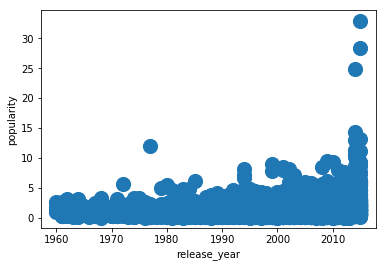

In [19]:
df.plot.scatter(x = 'release_year', y = 'popularity', s = 200);


popularity is slightly increasing over time

### Research Question 2 : How are revenues trending over time?


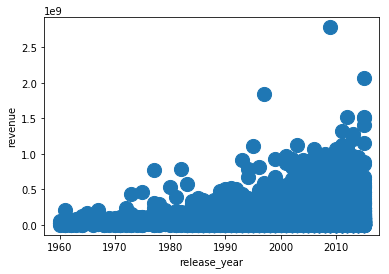

In [20]:
df.plot.scatter(x = 'release_year', y = 'revenue', s = 200);


revenue is increasing over time

### Research Question 3 : How is runtime trending over time?

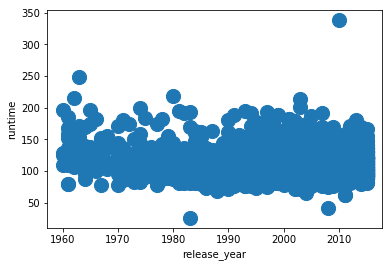

In [21]:
df.plot.scatter(x = 'release_year', y = 'runtime', s = 200);


runtime almost doesn't change over time

### Research Question 4 :Do top ratings movies always generate big revenue?

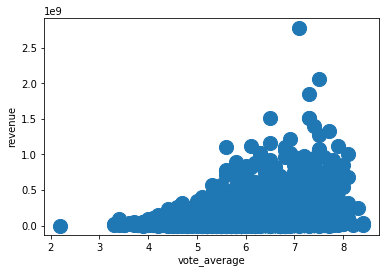

In [22]:
df.plot.scatter(x = 'vote_average', y = 'revenue', s = 200);


yes almost top ratings movies always generate big revenue

### Research Question 5 :Do higher budget movies always generate big revenue?

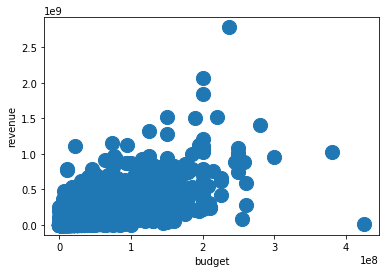

In [23]:
df.plot.scatter(x = 'budget', y = 'revenue', s = 200);

there's a posstive correlation between budget and revenue but now always higher budget leads to big revenue

### Research Question 6 :Is there any impact of vote count on revenue?

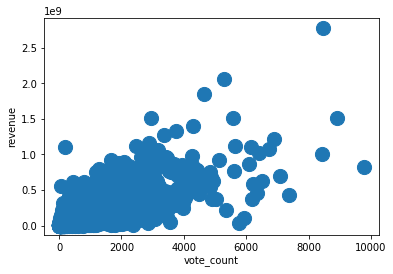

In [24]:
df.plot.scatter(x = 'vote_count', y = 'revenue', s = 200);

yes there's a possitive correlation between vote count and revenue

### Research Question 7 :Can we provide a list of the most popular directors based on ratings?

In [25]:
# summing the average ratings of each director
directors = df.groupby(['director'])['vote_average'].sum()
directors.sort_values(ascending=False)[:10]

director
Steven Spielberg     177.4
Clint Eastwood       139.3
Ridley Scott         130.2
Martin Scorsese      108.6
Tim Burton           105.4
Steven Soderbergh    104.6
Brian De Palma        96.1
Robert Zemeckis       94.5
Ron Howard            91.1
Tony Scott            89.8
Name: vote_average, dtype: float64

### Research Question 8 :Can we provide a list of directors that generates big revenue?


In [26]:
# list of directors with highst revenues
directors = df.groupby(['director'])['revenue'].sum()
directors.sort_values(ascending=False)[:10]

director
Steven Spielberg     8743270322
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Chris Columbus       3725631503
Robert Zemeckis      3707918494
Tim Burton           3665414624
J.J. Abrams          3579169916
Name: revenue, dtype: int64

### Research Question 9 :What are typical runtimes for directors? Is there a duration preferred by directors?


In [27]:
directors = df.groupby(['director'])['runtime'].mean()
directors.sort_values(ascending=True)[:10]

director
Burny Mattinson                                            26.0
Louis C.K.                                                 62.0
Stephen Anderson|Don Hall                                  63.0
Jennie Livingston                                          71.0
Robin Budd|Donovan Cook                                    72.0
Steve Trenbirth                                            72.0
Craig McCracken                                            73.0
Ron Clements|Burny Mattinson|David Michener|John Musker    74.0
Dave Bullock                                               75.0
Don Bluth                                                  75.5
Name: runtime, dtype: float64

In [28]:
directors.mode()

0    93.0
dtype: float64

the duration preferred by directors is : 93

### Research Question 10 : Movies which had most and least profit

In [29]:
import pprint
#defining the function
def calculate(column):
    
    #highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

calculate('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
profit_earned,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Research Question 11 : Movies with largest and lowest budgets

In [30]:
calculate('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
profit_earned,-413912431,99
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


### Research Question 12 : Movies with most and least earned revenue

In [31]:
calculate('revenue')

,1386,8142
popularity,9.43277,0.552091
budget,237000000,6000000
profit_earned,2544505847,-5999998
revenue,2781505847,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy


### Research Question 13 : Movies with longest and shortest runtime

In [32]:
calculate('runtime')


,2107,8005
popularity,0.534192,0.592219
budget,18000000,3000000
profit_earned,-17128721,18000000
revenue,871279,21000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation


<a id='conclusions'></a>
## Conclusions

in this data analysis, We came out with some very interesting facts about movies. After this analysis we can conclude following:

#### For a Movie to be in successful criteria

<ol>
 <li>revenues and popularity increase over time while runtime doesn't change
 <li>ratings, count of votes and budget has a possitive correlation with revenues
 <li>the duration preferred by directors is : 93
 
</ol>

#### limitations

<ol>
 <li>the dataset doesn't gurantuee that every movie for every director is listed
 <li>There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
 <li>Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
 <li>Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

 
</ol>
By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.



In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255